In [115]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [116]:
headers = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:85.0) Gecko/20100101 Firefox/85.0"
}

In [117]:
"https://www.imdb.com/search/title/?release_date=2020-01-01,2020-12-31&start=51&ref_=adv_nxt"

'https://www.imdb.com/search/title/?release_date=2020-01-01,2020-12-31&start=51&ref_=adv_nxt'

In [118]:
All_soup = []
for i in range(0, 300, 51):
    source = requests.get(f"https://www.imdb.com/search/title/?release_date=2020-01-01,2020-12-31&start={i}&ref_=adv_nxt", headers).text
    soup = BeautifulSoup(source, "lxml")
    page = soup.find_all("div", class_ = "lister-item-content")
    All_soup.append(page)
    

In [119]:
for page in All_soup:
    span = page[6].find("span", class_ = "lister-item-year text-muted unbold")
    print(span.text)
    

(2020)
(IV) (2020)
(2020)
(2020)
(2020)
(2020)


for page in All_soup:
    for div in page:
        print(div.find("p", class_ = "sort-num_votes-visible").find_all("span", attrs = {"name" : "nv"}))

   try:
                    gross = div.find("p", class_ = "sort-num_votes-visible").find_all("span", attrs = {"name" : "nv"})

                    if len(gross) == 2:

                        Gross_Net.append(gross[1].text)
                    else:
                    
                        gross = "unavailable"
                
                        Gross_Net.append(gross)
                except:
                    gross = "unavailable"
                    
                    Gross_Net.append(gross)

In [120]:

Title = []
Rating = []
Votes = []
Metascore = []
Genre = []
Story = []
Gross_Net = []
for page in All_soup:
    for div in page:
        
        title = (div.a.text)
        
        Title.append(title)
        
        try:
            rating = Rating.append(div.find("div", class_ = "inline-block ratings-imdb-rating").strong.text.strip())
        
        except:
            rating = "no rating"
            
            Rating.append(rating)
        
        try:
            votes = Votes.append(div.find("p", class_ = "sort-num_votes-visible").find("span", attrs = {"name":"nv"}).text)
        except:
            
            votes = "unavailable"
            
            Votes.append(votes)
            
        try:
            
            genre = Genre.append(div.find("p", class_ = "text-muted").find("span", class_ = "genre").text.strip())
            
        except:
            genre = "unavailable"
            
            Genre.append(genre)
            
        Story.append(div.find_all("p", class_ = "text-muted")[1].text.strip())
        
        try:
            score = Metascore.append(div.find("div", class_ = "inline-block ratings-metascore").span.text.strip())
        
        except:
            score = "not available"
        
            
            Metascore.append(score)
            
        try:
            
            gross = div.find("p", class_ = "sort-num_votes-visible").find_all("span", attrs = {"name" : "nv"})

            if len(gross) == 2:

                Gross_Net.append(gross[1].text)
            else:
                gross = "unavailable"
                
                Gross_net.append(gross)
        except:
            
            gross = "unavailable"
            
            Gross_Net.append(gross)

        
Movies = pd.DataFrame({"Title": Title,
                        "Rating": Rating,
                    "Metascore": Metascore,
                      "Genre": Genre,
                     "Votes": Votes,
                     "Story": Story,
                    "Gross_Net" : Gross_Net})            

len(Title), len(Rating), len(Votes), len(Genre), len(Story), len(Metascore)

(300, 300, 300, 300, 300, 300)

In [121]:
Movies[50:]

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net
50,Âya to majo,4.7,45,"Animation, Adventure, Family","1,047","An orphan girl, Earwig, is adopted by a witch ...",unavailable
51,Raised by Wolves,7.6,not available,"Drama, Fantasy, Sci-Fi","46,758",Androids are tasked with raising human childre...,unavailable
52,Hamilton,8.5,90,"Biography, Drama, History","57,085",The real life of one of America's foremost fou...,unavailable
53,The Midnight Sky,5.6,58,"Drama, Fantasy, Sci-Fi","65,729","This post-apocalyptic tale follows Augustine, ...",unavailable
54,Black Beach,5.6,not available,"Action, Drama, Thriller",792,Carlos is a businessman who gets a request to ...,unavailable
...,...,...,...,...,...,...,...
295,Saikojiman Gwaenchanha,8.7,not available,"Comedy, Drama, Romance","9,459",An extraordinary road to emotional healing ope...,unavailable
296,Superintelligence,5.3,41,"Comedy, Romance, Sci-Fi","5,414",When an all-powerful Superintelligence chooses...,unavailable
297,Like a Boss,4.6,33,Comedy,"10,362",Two friends with very different ideals start a...,unavailable
298,Truth Seekers,7.1,not available,"Comedy, Drama, Fantasy","8,576",A team of part-time paranormal investigators u...,unavailable


In [122]:
Movies.query('Gross_Net != "unavailable"').sort_values(by = "Gross_Net", ascending = False)

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net
18,Birds of Prey: And the Fantabulous Emancipatio...,6.1,60,"Action, Adventure, Comedy","168,542","After splitting with the Joker, Harley Quinn j...",$84.16M
140,Dolittle,5.6,26,"Adventure, Comedy, Family","48,837",A physician who can talk to animals embarks on...,$77.05M
75,The Invisible Man,7.1,72,"Drama, Horror, Mystery","168,763",When Cecilia's abusive ex takes his own life a...,$64.91M
197,The Call of the Wild,6.8,47,"Adventure, Drama, Family","38,792",A sled dog struggles for survival in the wilds...,$62.34M
143,Onward,7.4,61,"Animation, Adventure, Comedy","102,376",Two elven brothers embark on a quest to bring ...,$61.56M
9,Tenet,7.5,69,"Action, Sci-Fi, Thriller","294,946","Armed with only one word, Tenet, and fighting ...",$53.80M
105,Bad Boys for Life,6.6,59,"Action, Comedy, Crime","131,022",Miami detectives Mike Lowrey and Marcus Burnet...,$206.31M
112,Sonic the Hedgehog,6.5,47,"Action, Adventure, Comedy","89,626","After discovering a small, blue, fast hedgehog...",$146.07M
214,Ba bai,7.0,64,"Action, Drama, History","2,228",From the acclaimed filmmaker behind Mr. Six co...,$0.37M


In [124]:
a = 1
base_url= "https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&start="
year = str("2019-01-01,2019-12-1") 
q = f"&start={a}&ref_=adv_nxt"

base_url+year+q

'https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&start=2019-01-01,2019-12-1&start=1&ref_=adv_nxt'

#  Automating The Scraping for Each Year and Number of Movies

In [125]:
a = 1
base_url= "https://www.imdb.com/search/title/?release_date="
year = str("2018-01-01,2018-12-1")
complete = f"&start={a}&ref_=adv_nxt"
#q = f"&start={a}&ref_=adv_nxt"

base_url+year+complete

'https://www.imdb.com/search/title/?release_date=2018-01-01,2018-12-1&start=1&ref_=adv_nxt'

In [128]:
def MovieYear(base_url, year, header, Movie_num):
    Frame = pd.DataFrame()
        
    All_soup = []
    for i in range(0, Movie_num, 51):
        url = base_url + year + f"&start={i}&ref_=adv_nxt"
        source = requests.get(url, headers).text
        soup = BeautifulSoup(source, "lxml")
        page = soup.find_all("div", class_ = "lister-item-content")
        All_soup.append(page)


    Title = []
    Rating = []
    Votes = []
    Metascore = []
    Genre = []
    Story = []
    Gross_Net = [] 
    Year = []

    for page in All_soup:

        for div in page:


            title = (div.a.text)

            Title.append(title)

            year = div.find("span", class_ = "lister-item-year text-muted unbold").text
            Year.append(year)

            try:
                rating = Rating.append(div.find("div", class_ = "inline-block ratings-imdb-rating").strong.text.strip())

            except:
                rating = "no rating"

                Rating.append(rating)

            try:
                votes = Votes.append(div.find("p", class_ = "sort-num_votes-visible").find("span", attrs = {"name":"nv"}).text)
            except:

                votes = "unavailable"

                Votes.append(votes)

            try:

                genre = Genre.append(div.find("p", class_ = "text-muted").find("span", class_ = "genre").text.strip())

            except:
                genre = "unavailable"

                Genre.append(genre)

            Story.append(div.find_all("p", class_ = "text-muted")[1].text.strip())

            try:
                score = Metascore.append(div.find("div", class_ = "inline-block ratings-metascore").span.text.strip())

            except:
                score = "not available"

                Metascore.append(score)


            try:
                gross = div.find("p", class_ = "sort-num_votes-visible").find_all("span", attrs = {"name" : "nv"})

                if len(gross) == 2:

                    Gross_Net.append(gross[1].text.strip())
                else:

                    gross = "unavailable"

                    Gross_Net.append(gross)
            except:
                gross = "unavailable"

                Gross_Net.append(gross)


            Movies = pd.DataFrame({"Title": Title,
                            "Rating": Rating,
                        "Metascore": Metascore,
                          "Genre": Genre,
                         "Votes": Votes,
                         "Story": Story,
                        "Gross_Net" : Gross_Net,
                        "Year": Year}) 

    Frame = Frame.append(Movies)
        
        
                
    return Frame
                

        


              

In [130]:
#  Testing for 100 Movies
Year_2020 = str("2020-01-01,2020-12-31")

Mo = MovieYear(base_url, Year_2020, headers, 100 )


In [131]:
Mo  #  There we have our 100 Movies for 2020 

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,(2020– )
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,(2020)
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,(2020)
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,(II) (2020–2021)
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,(2020)
...,...,...,...,...,...,...,...,...
95,The Kid Detective,6.9,74,"Comedy, Drama, Mystery","4,702","A once-celebrated kid detective, now 32, conti...",unavailable,(2020)
96,Rebecca,6.0,46,"Drama, Mystery, Romance","30,471",A young newlywed arrives at her husband's impo...,unavailable,(I) (2020)
97,Little Fish,6.8,71,"Drama, Romance, Sci-Fi",669,A couple fights to hold their relationship tog...,unavailable,(2020)
98,Home Movie: The Princess Bride,7.3,not available,"Short, Comedy, Fantasy",606,Serialized remake of 'The Princess Bride' told...,unavailable,(2020– )


In [132]:
# Getting 1000 movies between 2016 and 2020

In [133]:
Year_2020 = str("2020-01-01,2020-12-31")
Year_2019 = str("2019-01-01,2019-12-31")
Year_2018 = str("2018-01-01,2018-12-31")
Year_2017 = str("2017-01-01,2017-12-31")
Year_2016 = str("2016-01-01,2016-12-31")


In [134]:
Movie_20 = MovieYear(base_url, Year_2020, headers, 1000)
Movie_19 = MovieYear(base_url, Year_2019, headers, 1000)
Movie_18 = MovieYear(base_url, Year_2018, headers, 1000)
Movie_17 = MovieYear(base_url, Year_2017, headers, 1000)
Movie_16 = MovieYear(base_url, Year_2016, headers, 1000)

In [135]:
Movie_20

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,(2020– )
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,(2020)
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,(2020)
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,(II) (2020–2021)
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,(2020)
...,...,...,...,...,...,...,...,...
995,Uncle Peckerhead,5.9,not available,"Comedy, Horror, Music","1,285","When a punk band scores their first tour, life...",unavailable,(2020)
996,Welcome Home,7.4,not available,"Crime, Drama, Horror","1,853",A census report leads two female government te...,unavailable,(VI) (2020)
997,Welcome to Sudden Death,4.2,not available,"Action, Drama, Thriller","1,304",A security guard (ex special forces) brings hi...,unavailable,(2020 Video)
998,I Am Greta,6.1,69,"Documentary, Biography","5,973","The documentary follows Greta Thunberg, a teen...",unavailable,(2020)


In [136]:
Movie_19

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,The Mandalorian,8.8,not available,"Action, Adventure, Sci-Fi","289,336",The travels of a lone bounty hunter in the out...,unavailable,(2019– )
1,The Boys,8.7,not available,"Action, Comedy, Crime","247,155",A group of vigilantes set out to take down cor...,unavailable,(2019– )
2,Avengers: Endgame,8.4,78,"Action, Adventure, Drama","818,305",After the devastating events of Avengers: Infi...,$858.37M,(2019)
3,Euphoria,8.4,not available,Drama,"64,696",A look at life for a group of high school stud...,unavailable,(2019– )
4,The Bay,7.0,not available,"Crime, Drama","3,844",Detective Sergeant Lisa Armstrong investigates...,unavailable,(2019– )
...,...,...,...,...,...,...,...,...
995,The Death and Return of Superman,7.1,not available,"Animation, Action, Sci-Fi","3,293",The Death of Superman (2018) and Reign of the ...,unavailable,(2019 Video)
996,Run with the Hunted,5.2,38,"Crime, Drama, Thriller",602,"Oscar, a young boy, defends his best friend, L...",$0.01M,(2019)
997,Reef Break,6.0,not available,"Crime, Drama","1,714",A crime drama featuring main character Cat Cha...,unavailable,(2019)
998,A Guide to Second Date Sex,5.5,not available,"Comedy, Romance",783,Laura and Ryan have been totally destroyed by ...,unavailable,(2019)


In [137]:
Movie_18

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Cobra Kai,8.6,not available,"Action, Comedy, Drama","108,762",Decades after their 1984 All Valley Karate Tou...,unavailable,(2018– )
1,Yellowstone,8.6,not available,"Drama, Western","31,727",A ranching family in Montana faces off against...,unavailable,(2018– )
2,9-1-1,7.7,not available,"Action, Drama, Thriller","21,359",Explores the high-pressure experiences of the ...,unavailable,(2018– )
3,A Discovery of Witches,8.0,not available,"Drama, Fantasy, Romance","30,937","Diana Bishop, historian and witch, accesses As...",unavailable,(2018– )
4,Legacies,7.5,not available,"Adventure, Drama, Fantasy","19,273","Hope Mikaelson, a tribrid daughter of a Vampir...",unavailable,(2018– )
...,...,...,...,...,...,...,...,...
995,Sue Sue in the City,8.3,not available,"Comedy, Family",28,"Led by Sher, this unaired comedy pilot followe...",unavailable,(2018 TV Movie)
996,Dominion,9.1,not available,Documentary,"2,526","Dominion uses drones, hidden and handheld came...",unavailable,(2018)
997,Nancy,6.2,67,"Drama, Mystery","2,618",Nancy becomes increasingly convinced she was k...,$0.08M,(2018)
998,Sen Anlat Karadeniz,5.7,not available,Drama,"1,921",Nafes was forced to marry vedat who abused & t...,unavailable,(2018–2019)


In [138]:
Movie_17

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,The Sinner,7.9,not available,"Crime, Drama, Mystery","86,867",Anthology series that examines how and why ord...,unavailable,(2017– )
1,Riverdale,6.9,not available,"Crime, Drama, Mystery","118,286",While navigating the troubled waters of romanc...,unavailable,(2017– )
2,American Gods,7.8,not available,"Drama, Fantasy, Mystery","75,080",A recently released ex-convict named Shadow me...,unavailable,(2017– )
3,Ozark,8.4,not available,"Crime, Drama, Thriller","187,927",A financial advisor drags his family from Chic...,unavailable,(2017– )
4,La casa de papel,8.3,not available,"Action, Crime, Mystery","298,701",An unusual group of robbers attempt to carry o...,unavailable,(2017– )
...,...,...,...,...,...,...,...,...
995,Luna,5.5,not available,Thriller,654,When Luna's family is killed in cold blood on ...,unavailable,(II) (2017)
996,Lemon,4.6,59,"Comedy, Drama","1,857",A man watches his life unravel after he is lef...,$0.03M,(2017)
997,L'amant d'un jour,6.7,69,Drama,"1,937",A young woman returns home after the breakdown...,unavailable,(2017)
998,A Dash of Love,6.7,not available,"Comedy, Romance","1,893",When an aspiring chef lands a dream job at her...,unavailable,(2017 TV Movie)


In [139]:
Movie_16

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,The Crown,8.7,not available,"Biography, Drama, History","149,998",Follows the political rivalries and romance of...,unavailable,(2016– )
1,This Is Us,8.7,not available,"Comedy, Drama, Romance","106,732",A heartwarming and emotional story about a uni...,unavailable,(2016– )
2,Stranger Things,8.7,not available,"Drama, Fantasy, Horror","823,124","When a young boy disappears, his mother, a pol...",unavailable,(2016– )
3,Lucifer,8.1,not available,"Crime, Drama, Fantasy","232,846",Lucifer Morningstar has decided he's had enoug...,unavailable,(2016– )
4,Westworld,8.6,not available,"Drama, Mystery, Sci-Fi","428,454",Set at the intersection of the near future and...,unavailable,(2016– )
...,...,...,...,...,...,...,...,...
995,Hyeong,7.3,not available,"Comedy, Drama","2,415",Doo-Sik (Jo Jung-suk) gets paroled from prison...,$0.05M,(2016)
996,Shared Rooms,5.6,not available,"Comedy, Drama, Romance",505,A new romantic comedy feature film that brings...,unavailable,(2016)
997,Outlaws and Angels,5.4,40,"Action, Adventure, Drama","3,122",When outlaws on the lam invade the home of an ...,unavailable,(2016)
998,Watch Dogs 2,7.6,not available,"Action, Adventure, Comedy","2,885","In San Francisco, hacker Marcus Holloway joins...",unavailable,(2016 Video Game)


In [140]:
All_Movies = [Movie_20, Movie_19, Movie_18, Movie_17, Movie_16]

In [141]:
All_Movies = pd.concat(All_Movies)

In [142]:
All_Movies

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,(2020– )
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,(2020)
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,(2020)
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,(II) (2020–2021)
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,(2020)
...,...,...,...,...,...,...,...,...
995,Hyeong,7.3,not available,"Comedy, Drama","2,415",Doo-Sik (Jo Jung-suk) gets paroled from prison...,$0.05M,(2016)
996,Shared Rooms,5.6,not available,"Comedy, Drama, Romance",505,A new romantic comedy feature film that brings...,unavailable,(2016)
997,Outlaws and Angels,5.4,40,"Action, Adventure, Drama","3,122",When outlaws on the lam invade the home of an ...,unavailable,(2016)
998,Watch Dogs 2,7.6,not available,"Action, Adventure, Comedy","2,885","In San Francisco, hacker Marcus Holloway joins...",unavailable,(2016 Video Game)


In [143]:

# Checking duplicates Values

All_Movies[All_Movies.duplicated()]

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year


# Analysing The Data

In [144]:
All_Movies

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,(2020– )
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,(2020)
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,(2020)
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,(II) (2020–2021)
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,(2020)
...,...,...,...,...,...,...,...,...
995,Hyeong,7.3,not available,"Comedy, Drama","2,415",Doo-Sik (Jo Jung-suk) gets paroled from prison...,$0.05M,(2016)
996,Shared Rooms,5.6,not available,"Comedy, Drama, Romance",505,A new romantic comedy feature film that brings...,unavailable,(2016)
997,Outlaws and Angels,5.4,40,"Action, Adventure, Drama","3,122",When outlaws on the lam invade the home of an ...,unavailable,(2016)
998,Watch Dogs 2,7.6,not available,"Action, Adventure, Comedy","2,885","In San Francisco, hacker Marcus Holloway joins...",unavailable,(2016 Video Game)


In [145]:
copy = All_Movies.copy() # Keeping a copy for prosterity
copy.reset_index(drop = True, inplace = True)

In [146]:
copy.isnull().sum()

Title        0
Rating       0
Metascore    0
Genre        0
Votes        0
Story        0
Gross_Net    0
Year         0
dtype: int64

In [147]:
#  Data Cleaning

In [148]:
All_Movies.isnull().sum() #  Checking for null Values

Title        0
Rating       0
Metascore    0
Genre        0
Votes        0
Story        0
Gross_Net    0
Year         0
dtype: int64

In [149]:
All_Movies["Year"] = All_Movies["Year"].str.extract("(\d+)")

In [174]:
All_Movies["SubGenre"] = All_Movies["Genre"].str.extract("([A-zA-Z]+)")
All_Movies

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,2020,Drama
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,2020,Action
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,2020,Action
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,2020,Crime
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,2020,Drama
...,...,...,...,...,...,...,...,...,...
4995,Hyeong,7.3,not available,"Comedy, Drama","2,415",Doo-Sik (Jo Jung-suk) gets paroled from prison...,$0.05M,2016,Comedy
4996,Shared Rooms,5.6,not available,"Comedy, Drama, Romance",505,A new romantic comedy feature film that brings...,unavailable,2016,Comedy
4997,Outlaws and Angels,5.4,40,"Action, Adventure, Drama","3,122",When outlaws on the lam invade the home of an ...,unavailable,2016,Action
4998,Watch Dogs 2,7.6,not available,"Action, Adventure, Comedy","2,885","In San Francisco, hacker Marcus Holloway joins...",unavailable,2016,Action


In [175]:
All_Movies.reset_index(drop = True, inplace = True)

In [176]:
All_Movies = All_Movies.query('Year != "2021"')

# Getting all War Movies

In [177]:
War_Movies = All_Movies[All_Movies["Genre"].str.lower().str.contains("war")]
War_Movies.reset_index(drop = True, inplace = True)

In [178]:
War_Movies

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Dara iz Jasenovca,8.7,not available,"Drama, War","52,814",Follows the story of a young girl named Dara w...,unavailable,2020,Drama
1,Shadow in the Cloud,4.7,66,"Action, Horror, War","11,206",A female WWII pilot traveling with top secret ...,unavailable,2020,Action
2,"Quo vadis, Aida?",7.0,94,"Drama, History, War","13,405",Aida is a translator for the UN in the small t...,unavailable,2020,Drama
3,Da 5 Bloods,6.5,82,"Adventure, Drama, War","39,675",Four African-American vets battle the forces o...,unavailable,2020,Adventure
4,The Good Lord Bird,7.5,not available,"Drama, History, War","3,991",Ethan Hawke stars as abolitionist John Brown i...,unavailable,2020,Drama
...,...,...,...,...,...,...,...,...,...
72,Dad's Army,5.2,38,"Comedy, War","7,394",The Walmington-on-Sea Home Guard platoon deal ...,unavailable,2016,Comedy
73,Sniper Special Ops,3.2,not available,"Action, Drama, War","2,630",When the mission to rescue a U.S. Congressman ...,unavailable,2016,Action
74,Wolyn,7.6,not available,"Drama, History, War","4,870",Despite being in love with a Ukrainian boy fro...,unavailable,2016,Drama
75,My Honor Was Loyalty,4.3,not available,"Drama, War","1,098","Untersharführer Ludwig Herckel (Leone Frisa), ...",unavailable,2016,Drama


In [155]:
Rated_Movies = All_Movies.query('Rating != "no rating"')

In [156]:
A = Rated_Movies["Rating"].astype(float)

In [157]:
Rated_Movies["Rating"] = A

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
Rated_Movies

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,2020,Drama
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,2020,Action
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,2020,Action
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,2020,Crime
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,2020,Drama
...,...,...,...,...,...,...,...,...,...
4995,Hyeong,7.3,not available,"Comedy, Drama","2,415",Doo-Sik (Jo Jung-suk) gets paroled from prison...,$0.05M,2016,Comedy
4996,Shared Rooms,5.6,not available,"Comedy, Drama, Romance",505,A new romantic comedy feature film that brings...,unavailable,2016,Comedy
4997,Outlaws and Angels,5.4,40,"Action, Adventure, Drama","3,122",When outlaws on the lam invade the home of an ...,unavailable,2016,Action
4998,Watch Dogs 2,7.6,not available,"Action, Adventure, Comedy","2,885","In San Francisco, hacker Marcus Holloway joins...",unavailable,2016,Action


#  Top Ten Rated Movies


In [163]:
Rated_Movies.sort_values(by = "Rating", ascending = False)[:10].reset_index(drop = True)

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Wiedzmin 3: Dziki Gon Krew i wino,9.8,not available,"Action, Adventure, Crime","6,034",Geralt is in the southern province of Toussain...,unavailable,2016,Action
1,Threat Level Midnight: The Movie,9.7,not available,"Short, Action, Comedy","2,074",After secret agent Michael Scarn (played by St...,unavailable,2019,Short
2,BTS: Bon Voyage,9.7,not available,Reality-TV,683,BTS: Bon Voyage is a reality show about member...,unavailable,2016,Reality
3,Bluey,9.7,not available,"Animation, Short, Family","2,166",The slice-of-life adventures of an Australian ...,unavailable,2018,Animation
4,The Chosen,9.7,not available,"Drama, History","12,955",A charismatic fisherman drowning in debt. A tr...,unavailable,2017,Drama
5,Red Dead Redemption II,9.7,not available,"Action, Adventure, Crime","22,963",Amidst the decline of the Wild West at the tur...,unavailable,2018,Action
6,God of War,9.6,not available,"Action, Adventure, Drama","17,741","After wiping out the gods of Mount Olympus, Kr...",unavailable,2018,Action
7,The Sandman,9.6,not available,"Drama, Fantasy, Horror",359,When The Sandman is pulled from his realm and ...,unavailable,2020,Drama
8,Community Table Read,9.6,not available,"Short, Comedy",879,Dan Harmon and the cast of Community (plus Ped...,unavailable,2020,Short
9,Uncharted 4: A Thief's End,9.5,not available,"Action, Adventure, Drama","22,074",Thrown back into the dangerous underworld he'd...,unavailable,2016,Action


In [164]:
Rated_Movies[Rated_Movies["Year"].isnull()]

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
590,The North Water,7.2,not available,"Drama, Mystery",6,The North Water tells the story of Patrick Sum...,unavailable,NaN,Drama


In [165]:
#import warnings
#warnings.filterwarnings("ignore")

In [179]:
Rated_Movies["Year"][614] = 2020 

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [180]:
Rated_Movies["Year"][614]

2020.0

In [168]:
from datetime import datetime

In [181]:
Rated_Movies["Year"] = Rated_Movies["Year"].dropna().astype(int)



C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
Rated_Movies["Year"]

0       2020.0
1       2020.0
2       2020.0
3       2020.0
4       2020.0
         ...  
4995    2016.0
4996    2016.0
4997    2016.0
4998    2016.0
4999    2016.0
Name: Year, Length: 4990, dtype: float64

In [183]:
Rated_Movies

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Bridgerton,7.3,not available,"Drama, Romance","59,115","Wealth, lust, and betrayal set against the bac...",unavailable,2020.0,Drama
1,News of the World,6.9,73,"Action, Adventure, Drama","29,239","A Civil War veteran agrees to deliver a girl, ...",unavailable,2020.0,Action
2,Greenland,6.4,64,"Action, Drama, Thriller","59,408",A family struggles for survival in the face of...,unavailable,2020.0,Action
3,Your Honor,8.0,not available,"Crime, Drama, Thriller","14,846",A judge confronts his convictions when his son...,unavailable,2020.0,Crime
4,The Queen's Gambit,8.6,not available,"Drama, Sport","257,184","Orphaned at the tender age of nine, prodigious...",unavailable,2020.0,Drama
...,...,...,...,...,...,...,...,...,...
4995,Hyeong,7.3,not available,"Comedy, Drama","2,415",Doo-Sik (Jo Jung-suk) gets paroled from prison...,$0.05M,2016.0,Comedy
4996,Shared Rooms,5.6,not available,"Comedy, Drama, Romance",505,A new romantic comedy feature film that brings...,unavailable,2016.0,Comedy
4997,Outlaws and Angels,5.4,40,"Action, Adventure, Drama","3,122",When outlaws on the lam invade the home of an ...,unavailable,2016.0,Action
4998,Watch Dogs 2,7.6,not available,"Action, Adventure, Comedy","2,885","In San Francisco, hacker Marcus Holloway joins...",unavailable,2016.0,Action


# Movies With Gross Net

In [184]:
Box_Office_Movies = All_Movies.query('Gross_Net != "unavailable"')

In [185]:
Box_Office_Movies.reset_index(drop = True, inplace = True)


In [186]:
Box_Office_Movies["Rating"]= Box_Office_Movies["Rating"].astype(float)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [215]:
Box_Office_Movies["Helper_Gross"] = Box_Office_Movies["Gross_Net"].str.extract("(\d+\.\d+)").astype(float)
Box_Office_Movies["Helper_Gross"]

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


9        53.80
33       84.16
68       64.91
114     206.31
134      77.05
         ...  
4986      2.61
4988      0.00
4990      0.03
4993      1.54
4994      0.05
Name: Helper_Gross, Length: 1014, dtype: float64

# Top 10 Gross net Movies

In [188]:
Box_Office_Movies.sort_values(by = "Helper_Gross", ascending = False)[:10]

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre,Helper_Gross
12,Avengers: Endgame,8.4,78,"Action, Adventure, Drama","818,305",After the devastating events of Avengers: Infi...,$858.37M,2019,Action,858.37
157,Black Panther,7.3,88,"Action, Adventure, Sci-Fi","628,150","T'Challa, heir to the hidden but advanced king...",$700.06M,2018,Action,700.06
155,Avengers: Infinity War,8.4,68,"Action, Adventure, Sci-Fi","840,035",The Avengers and their allies must be willing ...,$678.82M,2018,Action,678.82
470,Star Wars: Episode VIII - The Last Jedi,7.0,84,"Action, Adventure, Fantasy","566,992",Rey develops her newly discovered abilities wi...,$620.18M,2017,Action,620.18
204,Incredibles 2,7.6,80,"Animation, Action, Adventure","251,343",The Incredibles family takes on a new mission ...,$608.58M,2018,Animation,608.58
33,The Lion King,6.9,55,"Animation, Adventure, Drama","213,383","After the murder of his father, a young lion p...",$543.64M,2019,Animation,543.64
736,Rogue One,7.8,65,"Action, Adventure, Sci-Fi","558,408",The daughter of an Imperial scientist joins th...,$532.18M,2016,Action,532.18
24,Star Wars: Episode IX - The Rise of Skywalker,6.6,53,"Action, Adventure, Fantasy","376,852",The surviving members of the resistance face t...,$515.20M,2019,Action,515.20
452,Beauty and the Beast,7.1,65,"Family, Fantasy, Musical","275,480",A selfish Prince is cursed to become a monster...,$504.01M,2017,Family,504.01
808,Finding Dory,7.3,77,"Animation, Adventure, Comedy","241,600",Friendly but forgetful blue tang Dory begins a...,$486.30M,2016,Animation,486.30


In [189]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [213]:
# Top Ten Gross_Net Revenue movies

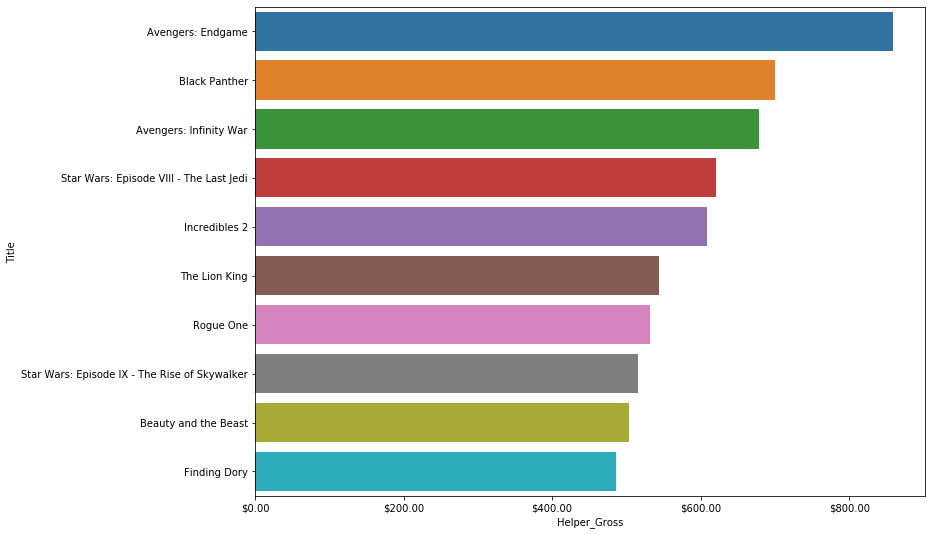

In [190]:
plt.figure(figsize = (12,9))
formatter = ticker.FormatStrFormatter("$%1.2f")
sb.barplot(y = "Title", x = "Helper_Gross", data = Box_Office_Movies.sort_values(by = "Helper_Gross", ascending = False)[:10]).xaxis.set_major_formatter(formatter)


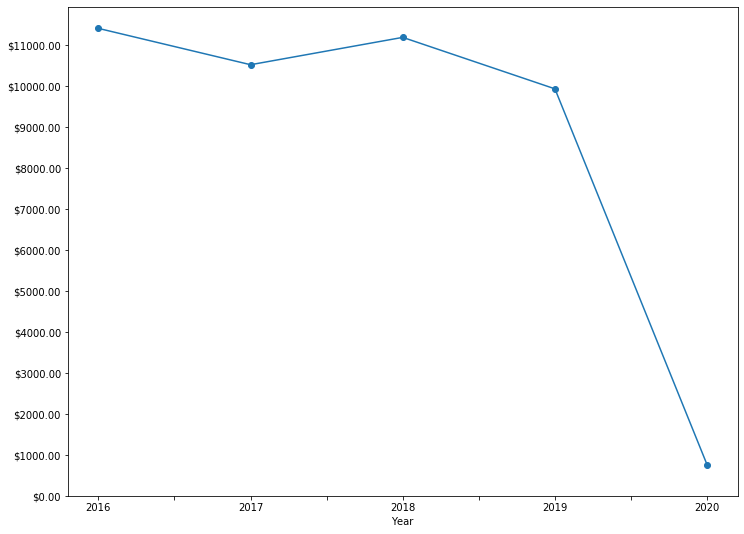

In [216]:
plt.figure(figsize = (12,9))
formatter = ticker.FormatStrFormatter("$%1.2f")
Box_Office_Movies.groupby("Year")["Helper_Gross"].sum().plot(marker = "o").yaxis.set_major_formatter(formatter)
plt.yticks(np.arange(0, 12000, 1000))


plt.show()    

In [217]:
Box_Office_Movies["Votes"] = Box_Office_Movies["Votes"].str.replace(",","").astype(int)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
Box_Office_Movies.sort_values(by = "Rating", ascending = False)[:10]

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre,Helper_Gross
1015,Gisaengchung,8.6,96,"Comedy, Drama, Thriller",560286,Greed and class discrimination threaten the ne...,53.37,2019,Comedy,53.37
1937,For Sama,8.5,89,"Documentary, War",9075,FOR SAMA is both an intimate and epic journey ...,0.03,2019,Documentary,0.03
1029,Joker,8.4,59,"Crime, Drama, Thriller",946270,"In Gotham City, mentally troubled comedian Art...",335.45,2019,Crime,335.45
3058,Coco,8.4,81,"Animation, Adventure, Family",387083,"Aspiring musician Miguel, confronted with his ...",209.73,2017,Animation,209.73
4115,Dangal,8.4,not available,"Action, Biography, Drama",157226,Former wrestler Mahavir Singh Phogat and his t...,12.39,2016,Action,12.39
4059,Kimi no na wa.,8.4,79,"Animation, Drama, Fantasy",196646,Two strangers find themselves linked in a biza...,5.02,2016,Animation,5.02
2040,Spider-Man: Into the Spider-Verse,8.4,87,"Animation, Action, Adventure",377932,Teen Miles Morales becomes the Spider-Man of h...,190.24,2018,Animation,190.24
2088,Capharnaüm,8.4,75,Drama,63494,While serving a five-year sentence for a viole...,1.66,2018,Drama,1.66
1006,Avengers: Endgame,8.4,78,"Action, Adventure, Drama",816716,After the devastating events of Avengers: Infi...,858.37,2019,Action,858.37
2016,Avengers: Infinity War,8.4,68,"Action, Adventure, Sci-Fi",839027,The Avengers and their allies must be willing ...,678.82,2018,Action,678.82


In [219]:
Rated_Movies.query('Year == "2021"')

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre


# Number of Movies across genre Over The Years

In [220]:
Rated_Movies.dropna().groupby(["SubGenre", "Year"]).size().unstack(1).dropna()

Year,2016.0,2017.0,2018.0,2019.0,2020.0
SubGenre,,,,,
Action,191.0,195.0,196.0,171.0,162.0
Adventure,27.0,27.0,31.0,37.0,29.0
Animation,66.0,60.0,65.0,74.0,57.0
Biography,58.0,61.0,72.0,50.0,26.0
Comedy,204.0,201.0,179.0,197.0,196.0
Crime,94.0,94.0,105.0,108.0,82.0
Documentary,40.0,33.0,29.0,22.0,60.0
Drama,231.0,233.0,230.0,241.0,272.0
Family,5.0,5.0,1.0,2.0,6.0


In [193]:
Box_Office_Movies.groupby("SubGenre")["Rating"].size()

SubGenre
Action         248
Adventure       49
Animation       72
Biography      126
Comedy         179
Crime           61
Documentary     18
Drama          221
Family           1
Fantasy          3
Horror          37
Mystery          1
Thriller         4
Name: Rating, dtype: int64

# Average Rating Over The Years Across Genre

In [194]:
Box_Office_Movies.groupby(["SubGenre", "Year"])["Rating"].mean().unstack(1)

Year,2016,2017,2018,2019,2020
SubGenre,,,,,
Action,6.312500,6.469643,6.307143,6.456757,6.74
Adventure,6.755556,6.592308,6.157143,6.554545,6.20
Animation,6.800000,6.410000,7.035714,6.714286,6.90
Biography,6.971429,6.750000,6.650000,6.972727,NaN
Comedy,6.324074,6.222642,6.163636,6.537037,4.70
Crime,6.300000,6.347368,6.731818,5.720000,5.30
Documentary,7.700000,7.525000,7.944444,8.250000,NaN
Drama,6.581967,6.383333,6.518644,6.628571,7.10
Family,NaN,7.100000,NaN,NaN,NaN


In [195]:
Box_Office_Movies["Votes"]

0       294,946
1       168,542
2       168,763
3       131,022
4        89,626
         ...   
1015      9,460
1016     13,145
1017      3,205
1018      1,607
1019      2,415
Name: Votes, Length: 1020, dtype: object

In [196]:
import pandas as pd

In [197]:
Files = pd.read_csv("C:/Users/admin/Desktop/NotebooksPython/IDMV_Top_Movies.csv").drop("Unnamed: 0", axis = 1)

In [198]:
Files["Year"] = Files['Year'].str.extract("(\d+)")
Files["Year"]

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4995    2016
4996    2016
4997    2016
4998    2016
4999    2016
Name: Year, Length: 5000, dtype: object

In [199]:
Files[Files["Year"].isnull()]

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
614,The North Water,7.2,not available,"Drama, Mystery",6,The North Water tells the story of Patrick Sum...,unavailable,NaN


In [200]:
Files.loc[614]["Year"]= 2020

In [201]:
Files = Files.query('Year != "2021"')

In [202]:
Files["Year"].unique()

array(['2020', 2020, '2019', '2018', '2017', '2016'], dtype=object)

In [203]:
Files

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Bridgerton,7.3,not available,"Drama, Romance","57,795","Wealth, lust, and betrayal set against the bac...",unavailable,2020
1,Promising Young Woman,7.5,72,"Crime, Drama, Thriller","31,748","A young woman, traumatized by a tragic event i...",unavailable,2020
2,The Queen's Gambit,8.6,not available,"Drama, Sport","254,597","Orphaned at the tender age of nine, prodigious...",unavailable,2020
3,Snowpiercer,6.8,not available,"Action, Drama, Sci-Fi","26,815",Seven years after the world has become a froze...,unavailable,2020
4,Your Honor,8.1,not available,"Crime, Drama, Thriller","11,848",A judge confronts his convictions when his son...,unavailable,2020
...,...,...,...,...,...,...,...,...
4995,Gyeolhongyeyak,7.6,not available,Drama,456,Ji-Hoon (Lee Seo-Jin) has a cynical personalit...,unavailable,2016
4996,The Man in the Silo,5.1,not available,Drama,124,Racial family conflict results in a horrific c...,unavailable,2016
4997,Richard III,8.4,not available,Drama,66,Almeida Theatre Live makes its debut broadcast...,unavailable,2016
4998,Days of Harmony,no rating,not available,Short,unavailable,The film depicts Joseph and Emma Smith's faith...,unavailable,2016


In [204]:
Rated = Files.query('Rating != "no rating"')

In [205]:
Top_Rated = Rated.sort_values(by = "Rating", ascending = False)[:20].reset_index(drop = True)
Top_Rated

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year
0,Wiedzmin 3: Dziki Gon Krew i wino,9.8,not available,"Action, Adventure, Crime","6,029",Geralt is in the southern province of Toussain...,unavailable,2016
1,Threat Level Midnight: The Movie,9.7,not available,"Short, Action, Comedy","2,034",After secret agent Michael Scarn (played by St...,unavailable,2019
2,Red Dead Redemption II,9.7,not available,"Action, Adventure, Crime","22,910",Amidst the decline of the Wild West at the tur...,unavailable,2018
3,Bluey,9.7,not available,"Animation, Short, Family","2,143",The slice-of-life adventures of an Australian ...,unavailable,2018
4,The Chosen,9.7,not available,"Drama, History","12,843",A charismatic fisherman drowning in debt. A tr...,unavailable,2017
5,Community Table Read,9.7,not available,"Short, Comedy",870,Dan Harmon and the cast of Community (plus Ped...,unavailable,2020
6,God of War,9.6,not available,"Action, Adventure, Drama","17,716","After wiping out the gods of Mount Olympus, Kr...",unavailable,2018
7,The Sandman,9.6,not available,"Drama, Fantasy, Horror",355,When The Sandman is pulled from his realm and ...,unavailable,2020
8,Planet Earth II,9.5,not available,Documentary,"96,951",Wildlife documentary series with David Attenbo...,unavailable,2016
9,The Last Drive-In with Joe Bob Briggs,9.5,not available,"Comedy, Fantasy, Horror",871,Joe Bob is back! Watching B-Movies and giving ...,unavailable,2018


In [221]:
Files["SubGenre"] =  Files["Genre"].str.extract("([A-zA-Z]+)")

In [222]:
Files

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Bridgerton,7.3,not available,"Drama, Romance","57,795","Wealth, lust, and betrayal set against the bac...",unavailable,2020,Drama
1,Promising Young Woman,7.5,72,"Crime, Drama, Thriller","31,748","A young woman, traumatized by a tragic event i...",unavailable,2020,Crime
2,The Queen's Gambit,8.6,not available,"Drama, Sport","254,597","Orphaned at the tender age of nine, prodigious...",unavailable,2020,Drama
3,Snowpiercer,6.8,not available,"Action, Drama, Sci-Fi","26,815",Seven years after the world has become a froze...,unavailable,2020,Action
4,Your Honor,8.1,not available,"Crime, Drama, Thriller","11,848",A judge confronts his convictions when his son...,unavailable,2020,Crime
...,...,...,...,...,...,...,...,...,...
4995,Gyeolhongyeyak,7.6,not available,Drama,456,Ji-Hoon (Lee Seo-Jin) has a cynical personalit...,unavailable,2016,Drama
4996,The Man in the Silo,5.1,not available,Drama,124,Racial family conflict results in a horrific c...,unavailable,2016,Drama
4997,Richard III,8.4,not available,Drama,66,Almeida Theatre Live makes its debut broadcast...,unavailable,2016,Drama
4998,Days of Harmony,no rating,not available,Short,unavailable,The film depicts Joseph and Emma Smith's faith...,unavailable,2016,Short


# Movies With Gross net

In [223]:
Box_Office_Movies = Files.query('Gross_Net != "unavailable"')

In [224]:
Box_Office_Movies["Gross_Net"] = Box_Office_Movies["Gross_Net"].str.extract("(\d+\.\d+)")

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
Box_Office_Movies

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
9,Tenet,7.5,69,"Action, Sci-Fi, Thriller","292,854","Armed with only one word, Tenet, and fighting ...",53.80,2020,Action
33,Birds of Prey: And the Fantabulous Emancipatio...,6.1,60,"Action, Adventure, Comedy","167,921","After splitting with the Joker, Harley Quinn j...",84.16,2020,Action
68,The Invisible Man,7.1,72,"Drama, Horror, Mystery","168,336",When Cecilia's abusive ex takes his own life a...,64.91,2020,Drama
114,Bad Boys for Life,6.6,59,"Action, Comedy, Crime","130,739",Miami detectives Mike Lowrey and Marcus Burnet...,206.31,2020,Action
134,Dolittle,5.6,26,"Adventure, Comedy, Family","48,710",A physician who can talk to animals embarks on...,77.05,2020,Adventure
...,...,...,...,...,...,...,...,...,...
4986,Kapoor & Sons,7.7,not available,"Comedy, Drama, Family","23,351",A story revolving around a dysfunctional famil...,2.61,2016,Comedy
4988,Éperdument,5.8,not available,"Biography, Drama, Romance","1,469","Based on a true story, the impossible love bet...",0.00,2016,Biography
4990,Nocturama,6.5,71,"Drama, Thriller","4,395","Some young folks, tired of the society they're...",0.03,2016,Drama
4993,Neerja,7.7,not available,"Biography, Drama, Thriller","20,984",Neerja is the story of the courageous Neerja B...,1.54,2016,Biography


In [212]:
Files

,Title,Rating,Metascore,Genre,Votes,Story,Gross_Net,Year,SubGenre
0,Bridgerton,7.3,not available,"Drama, Romance","57,795","Wealth, lust, and betrayal set against the bac...",unavailable,2020,Drama
1,Promising Young Woman,7.5,72,"Crime, Drama, Thriller","31,748","A young woman, traumatized by a tragic event i...",unavailable,2020,Crime
2,The Queen's Gambit,8.6,not available,"Drama, Sport","254,597","Orphaned at the tender age of nine, prodigious...",unavailable,2020,Drama
3,Snowpiercer,6.8,not available,"Action, Drama, Sci-Fi","26,815",Seven years after the world has become a froze...,unavailable,2020,Action
4,Your Honor,8.1,not available,"Crime, Drama, Thriller","11,848",A judge confronts his convictions when his son...,unavailable,2020,Crime
...,...,...,...,...,...,...,...,...,...
4995,Gyeolhongyeyak,7.6,not available,Drama,456,Ji-Hoon (Lee Seo-Jin) has a cynical personalit...,unavailable,2016,Drama
4996,The Man in the Silo,5.1,not available,Drama,124,Racial family conflict results in a horrific c...,unavailable,2016,Drama
4997,Richard III,8.4,not available,Drama,66,Almeida Theatre Live makes its debut broadcast...,unavailable,2016,Drama
4998,Days of Harmony,no rating,not available,Short,unavailable,The film depicts Joseph and Emma Smith's faith...,unavailable,2016,Short


#  Conveting These DataFrame to csv for further analysis with power BI

In [229]:
Files.to_csv("Movies.csv", index = False)